# **Red Neuronal 1.0**

In [3]:
# Cargamos las librerías
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Importaremos una función necesaria para resolver nuestro problema concreto
from sklearn.datasets import make_circles

# Para visualizar el entrenamiento
import time
from IPython.display import clear_output

## Definiciones de la red, funciones de creación y activación

Factor muy importantes a tener en cuenta a la hora de programar una red neuronal:

- **NEURONA**: Las neuronas son las unidades de procesamiento. Cuando juntamos muchas de estas neuronas en diferentes capas es cuando logramos contruir un sistema que llamamos Red Neuronal capaz de codificar y procesar información de forma compleja.

- **VECTORIZACIÓN**: Todas las fórmulas que utilizamos dentro de nuestras neuronas admiten una vectorización. Trabajar de este modo es obviamente muy efectivo pues nos permite, dentro de una misma capa, realizar las mismas operaciones para todas la neuronas. De este modo, podríamos ver realmente a una Red Neuronal como un conjunto de capas (o módulos) dentro de las cuales se encuentran una serie de neuronas realizando las mismas operaciones.

In [95]:
# CALSE DE LA CAPA DE LA RED

# Comenzamos creando el objeto: CAPA NEURONAL
class neural_layer():
    
    # Función de inicialización
    def __init__(self, n_conn, n_neur, act_f):
        
        # Función de activación
        self.act_f = act_f
        
        # Parámetro de bayas (tantos como neuronas)
        # Lo inicializamos con un valor aleatorio entre -1 y 1...
        self.b = np.random.rand(1, n_neur)     * 2 - 1
        
        # Parámetro red (matriz de conexiones conexiones·neuronas)
        # Lo inicializamos con un valor aleatorio entre -1 y 1...
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    
    # Función para actualizar manualmente los parámetros
    def boost(self, W, b):
      self.W = W
      self.b = b
    

In [5]:
# FUNCIÓN CREACIÓN

def create_nn(topology, act_f):
    
    nn = [] # Neural network
    
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l + 1], act_f))
    
    return nn

## Funciones para el entrenamiento de la red

Con todo esto, ya tenemos realmente construida nuestra primera red neuronal. Ahora lo que toca es aprender a entrenarla:

 1. La idea es comenzar dándole a la red unos datos de entrada y forzándola a procesarlos hacia delante. Así comenzará a ejecutar las funciones de activación teniendo en cuenta las masas ponderadas iniciales contenidas en la matriz W hasta escupir un valor final.
 
 2. Después tendríamos que comparar este valor final (probablemente bastante aleatorio) con el resultad real ayudándonos de la función de coste. Así vamos a generar un error que utilizaremos para hacer una propagación hacia atrás en la red (aplicando un algoritmo de back propagation) para así calcular las derivadas parciales:

        1. Cómputo del error de la última capa
         
$$\delta^L = \frac{\partial C}{\partial a^L}\frac{\partial a^L}{\partial z^L}$$
         
        2. Retropropagamos el error a la capa anterior
        
$$\delta^{l-1} = W^l \delta^l \cdot \frac{\partial a^{l-1}}{\partial z^{l-1}}$$

        3. Calculamos las derivadas de la capa usando el error
        
$$\frac{\partial C}{\partial b^{l-1}} = \delta^{l-1}  \qquad  \frac{\partial C}{\partial w^{l-1}} = \delta^{l-1} a^{l-2}$$

 3. Finalmente, una vez tenemos las derivadas parciales ejecutaremos el algoritmo del descenso del gradiente para comenzar a optimizar la función de coste y, por tanto, entrenar a nuestra red. Una vez finalizado este proceso, volveríamos al paso 1 hasta que el error obtenido inferior al deseado.

In [6]:
# FUNCIÓN DE ENTRENAMIENTO

# Función de error cuadrático medio y su derivada
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def forwardPass(neural_net, X):
    
    #out =[(z0, a0), (z1, a1), ...]
    out = [(None, X)]
    
    for l, layer in enumerate(neural_net):
    
                     # Multiplicación matricial
                     # v
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b # Señal
        a = neural_net[l].act_f[0](z)
        
        out.append((z,a))
    
    return out


def train(neural_net, X, Y, l2_cost, lr=0.001):
    # -----------------------------------------
    # neural_net: Red neuronal
    # X: Valores de entrada
    # Y: Valores de salida
    # l2_cost: Función de coste
    # lr: Learning rage ó ratio de aprendizaje
    # -----------------------------------------
    

    
    
    # Forward pass ----------------------------
    out = forwardPass(neural_net, X)
    
    # Backward pass ---------------------------
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
        
        z = out[l + 1][0]
        a = out[l + 1][1]
        
        # print(a.shape)
        
        
        if l == len(neural_net) - 1:
            # Calcular delta última capa.
            deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            
        else:
            # Calcular delta respecto a capa previa.
            deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
           
        _W = neural_net[l].W
        
        # Y al mismo tiempo...
        # Gradient descend ------------------------
                         
                                            # De la tercera ecuación...
                                            # Valor medio porque tenemos 500 deltas
        neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr                    
        neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr 
    
    return out[-1][1]
# --------------------------------------------------------------------------------------------      

In [7]:
# FUNCIÓN PARA VISUALIZAR LA RESPUESTA DE LA RED

def drawState(neural_net, compare=True, res=50):
    _x0 = np.linspace(-1, 1, res)
    _x1 = np.linspace(-1, 1, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
        for i1, x1 in enumerate(_x1):
            _Y[i0,i1] = forwardPass(neural_net, np.array([[x0, x1]]))[-1][1]

    plt.pcolormesh(_x0, _x1, _Y.T, cmap="coolwarm")
    plt.colorbar()
    
    if compare == True:
        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue",  alpha=0.8, linewidth=0)
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="Moccasin", alpha=0.8, linewidth=0)
        plt.scatter(X[Y[:,0] == 2, 0], X[Y[:,0] == 2, 1], c="salmon" ,  alpha=0.8, linewidth=0)
        
    
    clear_output(wait=True)
    plt.show()
# --------------------------------------------------------------------------------------------

In [92]:
# FUNCIONES PARA GUARDAR Y CARGAR PARÁMETROS

def save(neural_net, file):
  with open(file, 'wb') as f:
      for l in range(len(neural_n)):
        np.save(f, neural_n[l].W)
        np.save(f, neural_n[l].b)

def load(neural_net, file):  
  with open(file, 'rb') as f:
      for l in range(len(neural_n)):
        neural_net[l].boost(np.load(f), np.load(f))
        

# Probamos nuestra Red Neuronal

Una vez programada la red, es hora de empezar a probarla introduciendo diversas fuentes de datos y funciones de activación.

## Definimos las **funciones de activación**

Expresamos las funciones de activación deseadas y su derivada en forma de array (nos basta con conocer la derivada porque vamos a aplicar un descenso del gradiente estocástico).

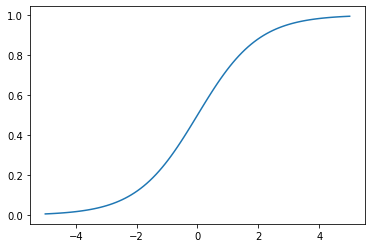

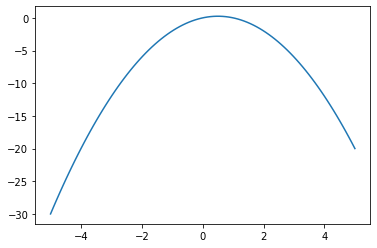

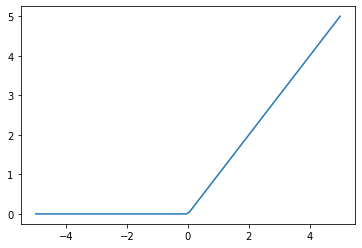

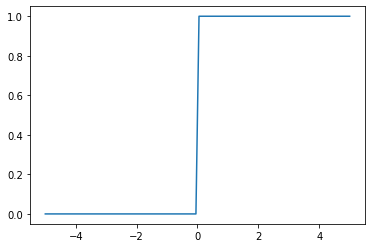

In [8]:
# FUNCIONES DE ACTIVACIÓN

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = (lambda x: np.maximum(0,x),
        lambda x: np.heaviside(x,0))

sino = (lambda x:  np.cos(x * 10),
        lambda x: -np.sin(x * 10) * 10)

identidad = (lambda x: x,
             lambda x: 1)

# Sigmoide: El valore de entrada se distorsiona
#           en un rango que va de 0 a 1.

# Vamos a visualizarlo:
_x = np.linspace(-5, 5, 100)

plt.plot(_x,sigm[0](_x))
plt.show()

plt.plot(_x,sigm[1](_x))
plt.show()

plt.plot(_x,relu[0](_x))
plt.show()

plt.plot(_x,relu[1](_x))
plt.show()

## Creación de un **dataset**

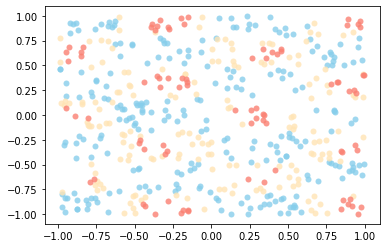

In [9]:
# CREAMOS EL DATASET

n = 500 # Tamaño del dataset
p = 2   # Entradas del dataset

X = np.random.rand(n,p) * 2 - 1
Y = np.sin(X[:,0] * 5) * np.cos(X[:,1] * 10)


for i in range(len(Y)):
    
    if Y[i] < 0.01:
        Y[i] = 0
        
    elif 0.01 <= Y[i] < 0.6:
        Y[i] = 1
        
    else:
        Y[i] = 2
          
Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue",  alpha=0.8, linewidth=0)
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="Moccasin", alpha=0.8, linewidth=0)
plt.scatter(X[Y[:,0] == 2, 0], X[Y[:,0] == 2, 1], c="salmon" ,  alpha=0.8, linewidth=0)


plt.show()


# # Visualizamos los círculos por separados gracias a la máscara Y
# fig, ax = plt.subplots()
# ax.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue", alpha=0.8, linewidth=0)
# ax.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon" , alpha=0.8, linewidth=0)
# ax.axis("equal")
# plt.show()

## Generación y entrenamiento de la **red**

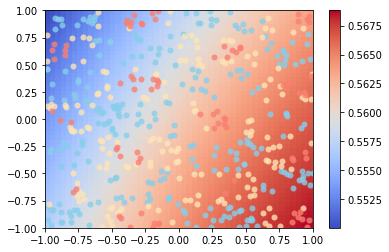

In [103]:
# Vamos a probar nuestra red neuronal, ¡ahora si!!
lifetime = 0
loss = []

# Introducimos la topología
topology1 = [p, 3, 1]
topology2 = [p, 4, 8, 4, 16, 6, 3, 1]
topology3 = [p, 8, 16, 8, 1]

# Generamos la red
neural_n = create_nn(topology3, sigm)

# Visualizamos su estado inicial
drawState(neural_n)

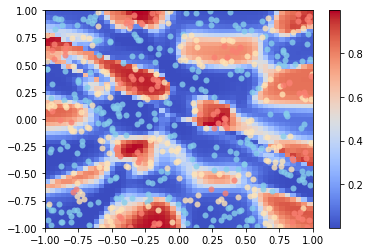

An m2 error of 0.024967715051831745 in lifetime = 20000 iterations.


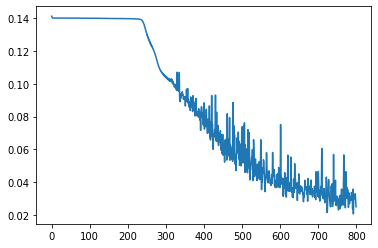

In [98]:
# Comenzamos a entrenar a la red

print("Ejecutando entrenamiento... ")

N = 10000
for i in range(N):
    
    # Entrenamos a la red
    Yp = train(neural_n, X, Y/2, l2_cost, lr=0.1)
    lifetime += 1
    
    if i % 25 == 0:
        
        loss.append(l2_cost[0](Yp, Y/2))
    
        if loss[-1] < 0.01:
            break

    if i % 1000 == 0:
      drawState(neural_n, res=50)
      print("Ejecutando entrenamiento: ", i)


# Dibujamos el estado final
drawState(neural_n, res=50)

print("An m2 error of {} in lifetime = {} iterations.".format(loss[-1],lifetime) )

plt.plot(range(len(loss)), loss)
plt.show()

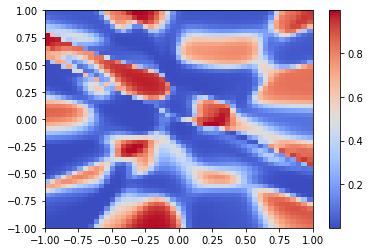

In [106]:
# Mostras únicamente la evaluación de la malla en la red
drawState(neural_n, res=50, compare=False)

In [100]:
# Guardamos los parámetros de la red
save(neural_n, 'save.npy')

In [105]:
# Cargamos los parámetros de la red
load(neural_n, 'save.npy')